In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x, y):
    return 1 - (x-1)**2 -(y-1)**2

def g1(y):
    return y - y**2

def g2(x):
    return (x-1)*(x-3)

def g3(y):
    return math.sin(math.pi*y)

def g4(x):
    return math.sin(math.pi*x)

def g5(y):
    return math.sin(2*math.pi*y)

def g6(x):
    return math.sin(2*math.pi*x)

# Задаем параметры
Ny = 100
Nx = 300
# Размер сетки
Lx = 3.0 
Ly= 1.0
# Длина стороны прямоугольника
h = Ly / Ny  # Шаг сетки
tau = 1  # Параметр метода верхней релаксации
max_iter = 1000  # Максимальное количество итераций
tolerance = 1e-10  # Погрешность

# Задаем граничные условия

# Инициализируем сетку значений
u = np.zeros((Nx+1, Ny+1))
fm = np.zeros((Nx+1, Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        fm[i,j] = f(i*h,j*h)
# Устанавливаем граничные условия
for i in range(Ny+1):
    u[0, i] = g5(i*h)
for i in range(Ny+1):
    u[-1, i] = g1(i*h)
for i in range(Nx+1):
    u[i, 0] = g6(i*h)
for i in range(Nx+1):
    u[i, -1] = g2(i*h)

# Численное решение уравнения Пуассона методом верхней релаксации
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, Nx):
        for j in range(1, Ny):
            u[i,j] = (tau/4)*((u[i-1,j] + u[i,j-1]) + (u_old[i+1,j] + u_old[i,j+1]) - 4*(1 - 1/tau)*u_old[i,j] + fm[i,j]*h**2)
    if(np.linalg.norm(u-u_old) < tolerance):
        break

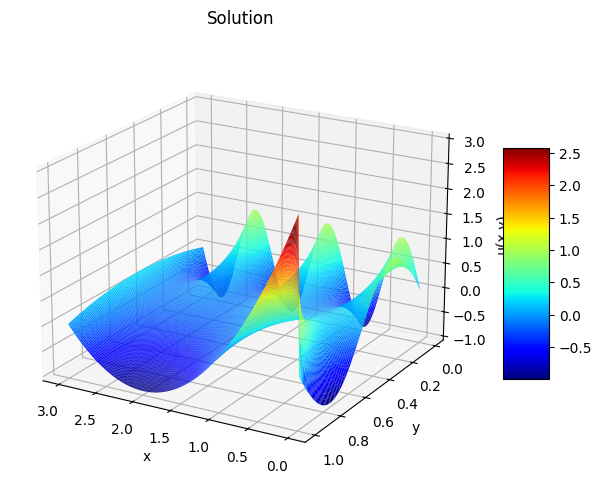

In [3]:
x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
X, Y = np.meshgrid(y, x*3)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=120) 
surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [4]:
u1 = u.copy()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x, y):
    return 1 - (x-1)**2 -(y-1)**2

def g1(y):
    return y - y**2

def g2(x):
    return (x-1)*(x-3)

def g3(y):
    return math.sin(math.pi*y)

def g4(x):
    return math.sin(math.pi*x)

def g5(y):
    return math.sin(2*math.pi*y)

def g6(x):
    return math.sin(2*math.pi*x)

# Задаем параметры
Ny = 300
Nx = 100
# Размер сетки
Lx = 1.0 
Ly= 3.0
# Длина стороны прямоугольника
h = Ly / Ny  # Шаг сетки
tau = 1  # Параметр метода верхней релаксации
max_iter = 1000  # Максимальное количество итераций
tolerance = 1e-10  # Погрешность

# Задаем граничные условия

# Инициализируем сетку значений
u = np.zeros((Nx+1, Ny+1))
fm = np.zeros((Nx+1, Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        fm[i,j] = f(i*h,j*h)
# Устанавливаем граничные условия
for i in range(Nx+1,Ny+1):
    u[0, i] = g5(i*h)
for i in range(Nx+1,Ny+1):
    u[-1, i] = g4(i*h)
for i in range(Nx+1):
    u[i, Nx] = g2(i*h)
for i in range(Nx+1):
    u[i, -1] = g3(i*h)

# Численное решение уравнения Пуассона методом верхней релаксации
for _ in range(max_iter):
    u_old = u.copy()
    for i in range(1, Nx):
        for j in range(Nx+1, Ny):
            u[i,j] = (tau/4)*((u[i-1,j] + u[i,j-1]) + (u_old[i+1,j] + u_old[i,j+1]) - 4*(1 - 1/tau)*u_old[i,j] + fm[i,j]*h**2)
    if(np.linalg.norm(u-u_old) < tolerance):
        break

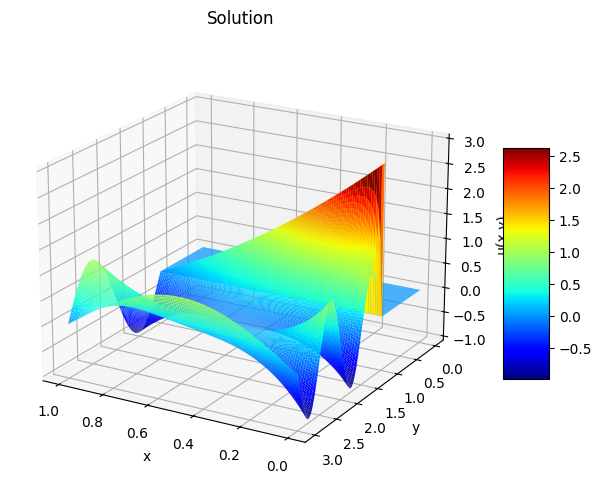

In [6]:
x = np.arange(Nx+1)/Nx
y = np.arange(Ny+1)/Ny
X, Y = np.meshgrid(y*3, x)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=120) 
surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
u2 = u.copy()

In [8]:
N = max(Ny, Nx)
n = min(Ny, Nx)

In [9]:
u = np.zeros((N+1,N+1))
#u1[:n+1,:n+1] = 0 

In [10]:
print(u.shape)
print(u1.shape)
print(u2.shape)

(301, 301)
(301, 101)
(101, 301)


In [11]:
u[:N+1,:n+1] = u1
u[:n+1, n+1:N+1] = u2[:,n+1:N+1]

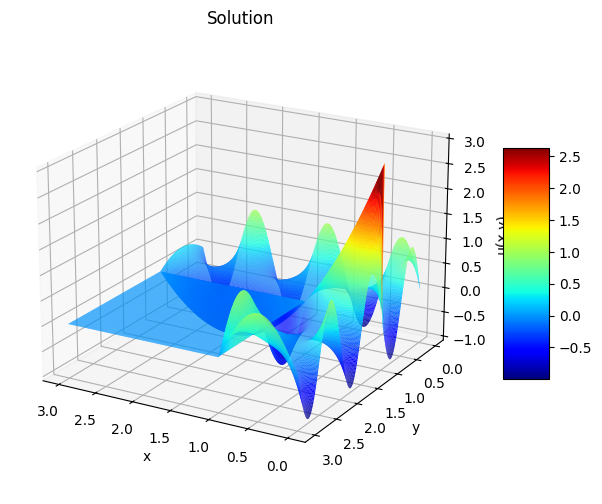

In [12]:
x = np.arange(N+1)/n
y = np.arange(N+1)/n
X, Y = np.meshgrid(y, x)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=120) 
surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

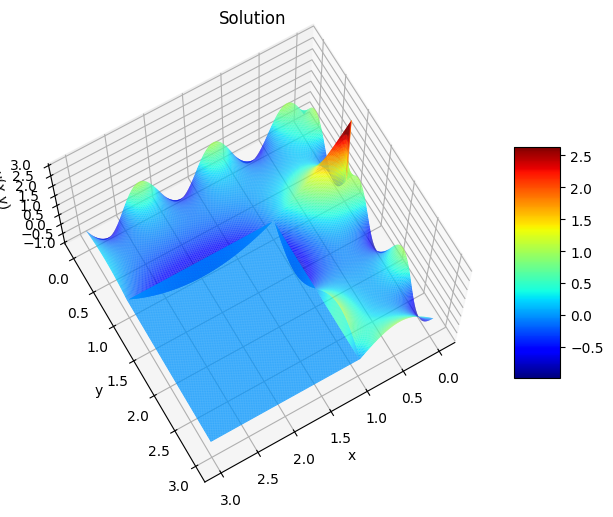

In [13]:
x = np.arange(N+1)/n
y = np.arange(N+1)/n
X, Y = np.meshgrid(y, x)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=70, azim=60) 
surf = ax.plot_surface(Y, X, u, cmap='jet', rstride=1, cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Solution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()